# Analiza seta podataka o studentima
Tomislav Kucar, kucar.tomislav@gmail.com
## Priprema okruzenja
Potreban nam je IPython (Jupyter), te moduli `pandas`, `matplotlib`, `scipy`, `seaborn`

## Projekt

Raditi cemo na datasetu student-por.csv (Portuguese language course) posto on
ima 650 stavki dok student-mat.csv ima samo 396, od cega je 382 studenata
zajednicko izmedu setova podataka. Bitno je znati kako studenti u datasetu
pohadaju 9 godina osnovnog skolovanja, nakon cega slijedi 3 godine
sekundarnog obrazovanja. Ocjene za tri godine sekundarnog obrazovanja oznacene su
kao G1, G2 i G3.

Za pocetak cemo ucitati podatke iz datoteke i priazati prvih 3 zapisa za studente svake skole,
"GP" - Gabriel Pereira i "MS" - Mousinho da Silveira.

In [66]:
import pandas as pd

path = 'https://frainfreeze.github.io/studying/university/12032-DecisionMakingSuportSystems/project/dataset/student-por.csv'
df = pd.read_csv(path, sep=';')
df.groupby('school').head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
423,MS,F,16,U,GT3,T,1,3,at_home,other,...,4,3,3,1,3,5,11,10,11,11
424,MS,F,16,R,GT3,T,2,2,other,other,...,4,4,4,1,1,5,0,12,12,12
425,MS,F,15,R,GT3,T,1,1,at_home,services,...,4,1,3,1,1,2,6,10,10,10


Nadalje moramo provjeriti imamo li nedostajucih vrijednosti.

In [67]:
df.isnull().values.any()

False

Provjerom otkrivamo kako nema nedostajućih vrijednosti.
Dataset je potpun. U slucaju da su postojale nedostajuce
vrijednosti rekodirali bi ih, npr .null. -> "missing", posto
nam nedostajuce vrijednosti takoder mogu sluziti kao podatak,
za sto bi iskoristili bi jednu od prikladnih metoda za
nedostajuce vrijednosti, no kako nemamo nedostajucih vrijednosti
u datasetu nastavljamo s analizom.

Da bismo bolje upoznali obiljezja varijabli i opcenito se bolje 
upoznali sa setom podataka racunamo temeljna statisticka obiljezja
te iscrtavamo historgrame za podatke:

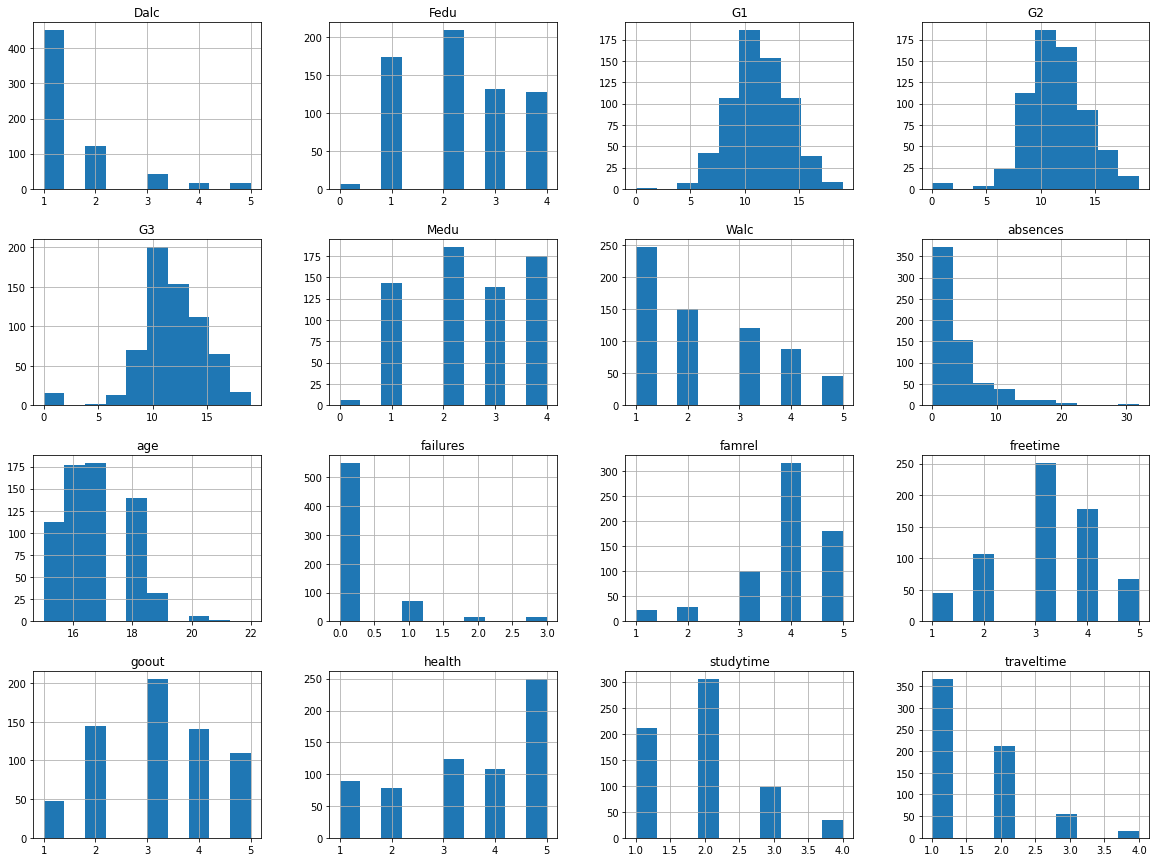

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [68]:
import matplotlib.pyplot as plt

df.hist(figsize=(20, 15))
plt.show()

df.describe()

Vidimo kako se radi o kompaktnoj distribuciji (jako niske standardne devijacije, 
i malena razlika izmedu min i max).

Dalc prestavlja unos alkohola tjekom radnog tjedna (1 jako malo, 5 jako puno),
vidimo kako jako malen studenata pije vece kolicine alkohola tjekom tjedna.
Wikiendom se broj studenata koji pije vecu kolicinu alkohola znatno povecava
(Walc, 1 jako malo, 5 jako puno.)

Fedu i Medu predstavljaju ocevu i majcinu razinu edukacije, koje su u ovom setu
podataka slicne, uz nesto veci stupanj vise edukacije oceva.

G1, G2, G3 su ocjene iz portugalskog na skali od 0 do 20, gdje je G1 first 
period grade, G2 second period grade i G3 final grade.

Polje absences predstavlja broj izostanaka iz skole (0 do 93)

Failures je broj proslih padova predmeta (n ako je 1 <= n < 3, inace 4)

famrel, freetime, goout i health predstavljaju odnose sa obitelji, kolicinu 
slobodnog vremena nakon skole, frekvenciju izlazaka sa prijateljima te trenutno 
stanje zdravlja, gdje je 1 jako nisko, 5 jako visoko.

Studytime i traveltime prestavljaju vrijeme potroseno na ucenje te na putovanje 
do skole, gdje je za study time imamo 1 - <2 sata, 2 - 2 do 5 sati, 3 - 5 do 10
sati, i 4 - >10 ucenja, te za traveltime 1 - <15 min., 2 - 15 do 30 min., 
3 - 30 min. do 1 sat, i 4 - >1 sata putovanja.

Nadalje zelimo izracunati i z vrijednosti, primjer za `age`:

In [69]:
import numpy as np
((df['age']-np.mean(df['age']))/np.std(df['age'])).head(5)

0    1.031695
1    0.210137
2   -1.432980
3   -1.432980
4   -0.611422
Name: age, dtype: float64

Z vrijednosti za sve brojcane stupce mozemo izracunati i pomocu zscore
funcije iz scipy paketa tako da cemo koristiti tu funkciju za normiranje
podataka:

In [70]:
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_norm = df[numeric_cols].apply(zscore)
df_norm.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-4.155470,-0.195820,-0.280658
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.874570,-0.195820,-0.280658
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.219064,0.491137,0.029116
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.948153,0.834615,0.648663
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,-0.145481,0.491137,0.338889


Zanima nas i zaobljenost te simetricnost distribucije:

In [71]:
df.kurt()

age           0.071509
Medu         -1.260619
Fedu         -1.109241
traveltime    1.108865
studytime     0.037846
failures      9.824409
famrel        1.348973
freetime     -0.396959
goout        -0.865454
Dalc          4.349297
Walc         -0.770689
health       -1.121175
absences      5.781078
G1            0.036638
G2            1.662465
G3            2.712204
dtype: float64

In [72]:
df.skew()

age           0.416795
Medu         -0.029950
Fedu          0.215343
traveltime    1.247648
studytime     0.699619
failures      3.092699
famrel       -1.105934
freetime     -0.181277
goout        -0.008580
Dalc          2.141913
Walc          0.635904
health       -0.500656
absences      2.020694
G1           -0.002774
G2           -0.360283
G3           -0.912909
dtype: float64

Ovom analizom zelimo predvjeti G3 (final grade) te otkriti korelaciju zavrsne
ocjene sa ostalim varijablama. Primjerice, utjece li konzumacija alkohola, broj izlazaka
sa prijateljima, broj izostanaka ili zdravlje na finalne rezultate?

Druga interesantna pitanja su utjece li vrijeme putovanja do skole, romanticna
veza ili odnos sa clanovima obitelji na broj izostanaka?

Izracunajmo i prikazimo korelacije varijabli sa ciljnom varijablom:

age          -0.106505
Medu          0.240151
Fedu          0.211800
traveltime   -0.127173
studytime     0.249789
failures     -0.393316
famrel        0.063361
freetime     -0.122705
goout        -0.087641
Dalc         -0.204719
Walc         -0.176619
health       -0.098851
absences     -0.091379
G1            0.826387
G2            0.918548
G3            1.000000
Name: G3, dtype: float64


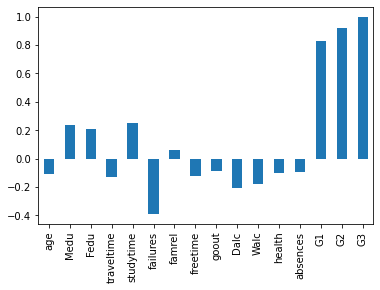

In [73]:
corrs = df[df.columns[1:]].corr()['G3'][:]
print(corrs)
corrs.plot.bar()

Za vizualni prikaz interesantan nam je i heatmap korelacijske matrice:

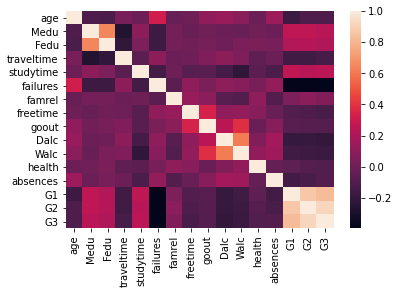

In [74]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #vmin=-1,vmax=1

Iz grafa jasno vidimo negativnu korelaciju failures (padova) sa ocjenama po razredima
(G1, G2, G3).

Ako pogledajmo grafove za odnosa proslih ocjena i finalnog rezultata:

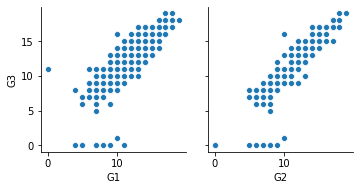

In [75]:
sns.pairplot(df,
                 x_vars=["G1", "G2"],
                 y_vars=["G3"])

mozemo i vizualno potvrditi snaznu korelaciju izmedu proslih rezultata i zavrsne ocjene.

Takoder vidimo i korelaciju stupnja edukacije oca i majke, te vremena ucenja, sa ciljnom varijablom:

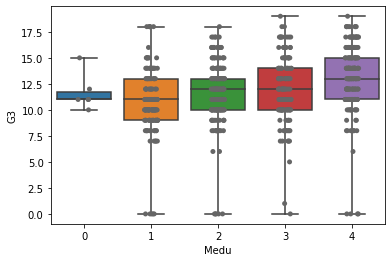

In [76]:
sns.boxplot(x="Medu", y="G3", data=df, whis=np.inf)
sns.stripplot(x="Medu", y="G3", data=df, color=".4")

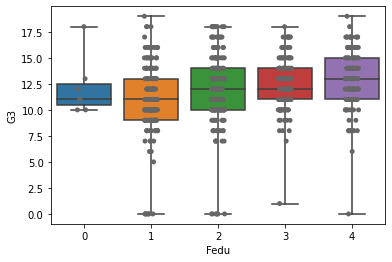

In [77]:
sns.boxplot(x="Fedu", y="G3", data=df, whis=np.inf)
sns.stripplot(x="Fedu", y="G3", data=df, color=".4")

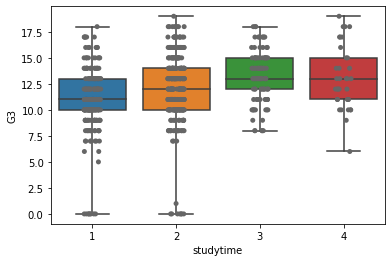

In [78]:
sns.boxplot(x="studytime", y="G3", data=df, whis=np.inf)
sns.stripplot(x="studytime", y="G3", data=df, color=".4")

Promotrimo dalje odnos izostanaka i toga jeli je student platio dodatne satove
u odnosu na finalnu ocjenu:

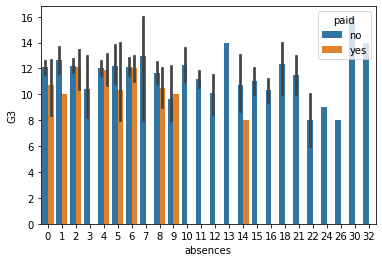

In [79]:
sns.barplot('absences', 'G3', hue='paid', data = df)

Jasno vidimo kako studenti koji placaju dodatne satove u pravilu izostaju rjede i
imaju nesto visu zavrsnu ocjenu.

## IV, WoE izracuni
- Izračunati IV, WoE za svaku varijablu i prikazati u Jupyter Notebooku
- Izdvojiti varijable sa najjačim IV-om i prikazati grafički WoE graf za sve najjače varijable
- Grupirati razrede po kriteriju WoE za najjače varijable
- Objasniti što ste spoznali temeljem ove analize (profili, uzroci, uzročno posljedične veze)
- Predložite kako biste riješili problem vezano uz vaš skup podataka temeljem  IV, WoE analize (što bi trebalo mijenjati, raditi drugačije, gdje je problem uzrok problema, koji su rizični profili ... )

## Literatura
- Goran Klepac, Sustavi potpore odlucivanju
- P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.